# Lesson 18

1. What's the machine learning?
2. What's the knn algorithm?
3. What's the regression?
4. What's the loss function and why it is the key our machine learning task.
5. Waht's the Gradient Descent?


In [96]:
from sklearn.datasets import fetch_openml
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random

In [16]:
dataset = fetch_openml(name='boston', version=1, as_frame=True, return_X_y=False, parser='pandas')

In [32]:
dir(dataset)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

In [34]:
dataset['feature_names']

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [40]:
print(dataset['DESCR'])

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [13]:
data = dataset['data']
target = dataset['target']
columns = dataset['feature_names']

In [18]:
dataframe = pd.DataFrame(data)
print(len(dataframe))
dataframe.head(5)

506


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [21]:
dataframe['price'] = dataset['target']

In [20]:
dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [22]:
dataframe.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

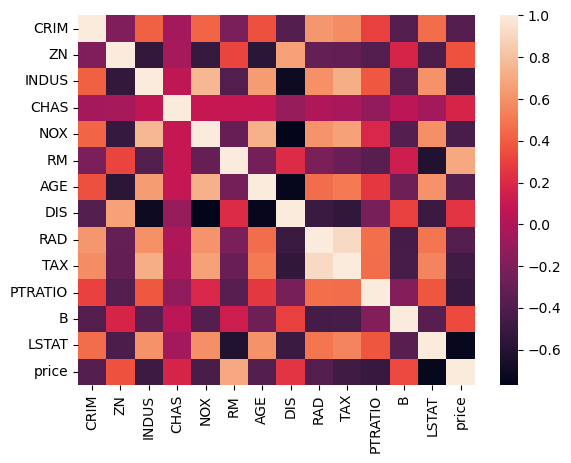

In [25]:
sns.heatmap(dataframe.corr())

In [44]:
X_rm = dataframe['RM'].values
y = dataframe['price']

In [45]:
rm_to_price = {r: y for r, y in zip(X_rm, y)}

In [48]:
rm_to_price[6.421]

21.6

In [85]:
def find_price_by_simila(history_price, query_x, topn=3):
    return np.mean([p for x, p in sorted(history_price.items(), key=lambda x_y: (x_y[0] - query_x) **2)[:topn]])



In [83]:
# 可读性改造
# def find_price_by_simila(history_price, query_x, topn=3):
#     most_similar_items = sorted(history_price.items(), key=lambda x_y: (x_y[0] - query_x) **2)[:topn]
#     most_similar_prices = [price for rm, price in most_similar_items]
#     average_prices = np.mean(most_similar_prices)
#     return average_prices

In [86]:
find_price_by_simila(rm_to_price, 7)

29.233333333333334

### 排序小灶

In [82]:
person_and_age = {
    'A张学友': 62,
    'C周杰伦': 44,
    'B毛不易': 29
}

np.mean([age for name, age in sorted(list(person_and_age.items()), key=lambda e: e[1], reverse=True)[:2]])

53.0

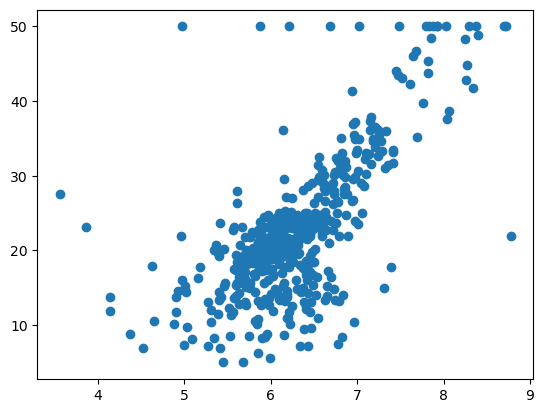

In [89]:
plt.scatter(X_rm, y)

In [92]:
real_y = [3, 6, 7]
y_hats = [3, 4, 7]
y_hats2 = [3, 6, 6]

In [93]:
def loss(y, yhat):
    return np.mean((np.array(y) - np.array(yhat))** 2)

In [94]:
loss(real_y, y_hats)

1.3333333333333333

In [95]:
loss(real_y, y_hats2)

0.3333333333333333

In [122]:
def model(x, k, b):
    return x * k +b

In [124]:
VAR_MAX, VAR_MIN = 100, -100
min_loss = float('inf')
best_k, best_b = None, None

total_times = 10**3

for t in range(total_times):
    k, b = random.randint(VAR_MIN, VAR_MAX), random.randint(VAR_MIN,VAR_MAX)

    loss_ = loss(y, model(X_rm, k, b))

    if loss_ < min_loss:
        min_loss = loss_
        best_k, best_b = k, b
        print("在{}时刻找到了更好的k: {}, b: {}， 这个loss是：{}".format(t, k, b, loss_))

在0时刻找到了更好的k: -31, b: -36， 这个loss是：65025.44479558695
在1时刻找到了更好的k: -1, b: 5， 这个loss是：661.1518645197629
在44时刻找到了更好的k: 11, b: -60， 这个loss是：224.98423060671936
在65时刻找到了更好的k: 6, b: -3， 这个loss是：196.57242231620552
在146时刻找到了更好的k: -2, b: 37， 这个loss是：107.93071815810276
在451时刻找到了更好的k: 11, b: -54， 这个loss是：100.16229384782608
在568时刻找到了更好的k: 10, b: -47， 这个loss是：88.70654683794466
在607时刻找到了更好的k: 8, b: -29， 这个loss是：45.775862071146236


In [142]:
def loss(y, yhat):
    return np.mean((np.array(y) - np.array(yhat)) ** 2)

def partial_k(x, y, k_n, b_n):
    return 2 * np.mean((y - (k * x + b))*(-x))

def partial_b(x, y, k_n, b_n):
    return 2 * np.mean((y - (k * x + b))*(-1))

In [187]:
k,b = random.random(), random.random()

min_loss = float('inf')
best_k, best_b = None, None

total_times = 10**5
alpha = 1e-3

k_b_history = []

for t in range(total_times):
    k = k + (-1) * partial_k(X_rm, y, k, b) * alpha 
    b = b + (-1) * partial_b(X_rm, y, k, b) * alpha

    loss_ = loss(y, model(X_rm, k, b))

    if loss_ < min_loss:
        min_loss = loss_
        best_k, best_b = k, b
        k_b_history.append([best_k, best_b])
        # print("在{}时刻找到了更好的k: {}, b: {}， 这个loss是：{}".format(t, k, b, loss_))

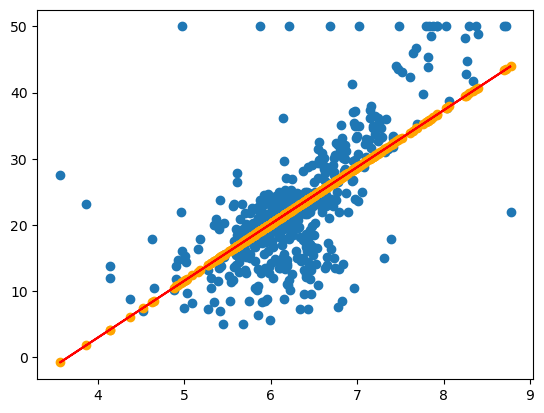

In [188]:
plt.scatter(X_rm, y)
plt.scatter(X_rm, best_k * X_rm + best_b, color='orange')
plt.plot(X_rm, best_k * X_rm + best_b, color='red')

In [189]:
test_0, test_1, test_2, test_3, test_4 = 0, 10, 50, 5000, -1

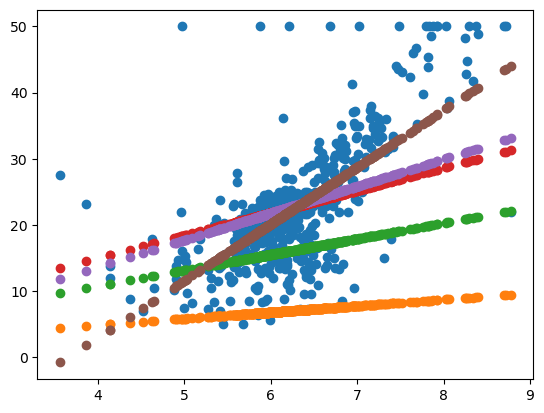

In [192]:
plt.scatter(X_rm, y)
plt.scatter(X_rm, k_b_history[test_0][0] * X_rm + k_b_history[test_0][1])
plt.scatter(X_rm, k_b_history[test_1][0] * X_rm + k_b_history[test_1][1])
plt.scatter(X_rm, k_b_history[test_2][0] * X_rm + k_b_history[test_2][1])
plt.scatter(X_rm, k_b_history[test_3][0] * X_rm + k_b_history[test_3][1])
plt.scatter(X_rm, k_b_history[test_4][0] * X_rm + k_b_history[test_4][1])

In [210]:
%time
model(7, best_k, best_b)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 1.67 µs


28.718752244698216

In [211]:
%time
find_price_by_simila(rm_to_price, 7)

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 5.01 µs


29.233333333333334